In [269]:
# All the code in this assignment was written by myself with reference to the lecture notes.
# However, when I encountered error messages or when the output did not match my expectations, I asked ChatGPT for clarification.

import warnings
warnings.filterwarnings('ignore')

In [270]:
# Part 1: Iris

# Load the Iris dataset and split the dataset into a training set and a test set.
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris = load_iris()
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 100, test_size = 0.15)


In [271]:
# Train a Decision Tree classifier and predict on the test set.
from sklearn import tree

DT = tree.DecisionTreeClassifier(criterion = 'entropy')
DT.fit(X_train, y_train)
DT_predictions = DT.predict(X_test)

In [272]:
# Train a KNN classifier and predict on the test set.
from sklearn.neighbors import KNeighborsClassifier

KNN = KNeighborsClassifier(n_neighbors=5)
KNN.fit(X_train, y_train)
KNN_predictions = KNN.predict(X_test)

In [273]:
# Find the samples where the classifiers agree.
agreements = []
for i in range(len(X_test)):
    if KNN_predictions[i] == DT_predictions[i]:
        agreements.append(X_test[i])

DT_agree = DT.predict(agreements)
KNN_agree = KNN.predict(agreements)
for i, sample in enumerate(agreements):
    print("The sample input:", sample)
    print("KNN Prediction:", iris.target_names[KNN_agree[i]])
    print("DT Prediction:", iris.target_names[DT_agree[i]])
    print()

The sample input: [6.4 2.8 5.6 2.1]
KNN Prediction: virginica
DT Prediction: virginica

The sample input: [4.8 3.4 1.6 0.2]
KNN Prediction: setosa
DT Prediction: setosa

The sample input: [7.7 2.6 6.9 2.3]
KNN Prediction: virginica
DT Prediction: virginica

The sample input: [5.7 4.4 1.5 0.4]
KNN Prediction: setosa
DT Prediction: setosa

The sample input: [6.3 2.7 4.9 1.8]
KNN Prediction: virginica
DT Prediction: virginica

The sample input: [7.7 3.  6.1 2.3]
KNN Prediction: virginica
DT Prediction: virginica

The sample input: [5.2 4.1 1.5 0.1]
KNN Prediction: setosa
DT Prediction: setosa

The sample input: [4.9 3.  1.4 0.2]
KNN Prediction: setosa
DT Prediction: setosa

The sample input: [6.5 3.  5.5 1.8]
KNN Prediction: virginica
DT Prediction: virginica

The sample input: [4.8 3.  1.4 0.3]
KNN Prediction: setosa
DT Prediction: setosa

The sample input: [5.  3.5 1.3 0.3]
KNN Prediction: setosa
DT Prediction: setosa

The sample input: [6.4 3.2 5.3 2.3]
KNN Prediction: virginica
DT Pre

In [274]:
# Find the samples where the classifiers disagree.
disagreements = []
for i in range(len(X_test)):
    if KNN_predictions[i] != DT_predictions[i]:
        disagreements.append(X_test[i])

DT_disagree = DT.predict(disagreements)
KNN_disagree = KNN.predict(disagreements)
for i, sample in enumerate(disagreements):
    print("The sample input:", sample)
    print("KNN Prediction:", iris.target_names[KNN_disagree[i]])
    print("DT Prediction:", iris.target_names[DT_disagree[i]])
    print()

The sample input: [6.7 3.  5.  1.7]
KNN Prediction: versicolor
DT Prediction: virginica



In [275]:
# KNN (K-Nearest Neighbors) makes predictions based on the proximity of data points, whereas decision trees rely on rules derived from data splits. 
# Among the five nearest data points to [6.7, 3.0, 5.0, 1.7], the majority may belong to the "versicolor" class. 
# However, according to the splitting rules learned by the decision tree, the group that [6.7, 3.0, 5.0, 1.7] falls into has a higher proportion of "virginica" samples, 
# which leads to different predictions by the two methods.

In [276]:
# Part 2: Mushrooms

# Load the Mushrooms dataset and split the dataset into a training set and a test set.
import pandas as pd
import os
from sklearn.preprocessing import LabelEncoder

os.chdir("/Users/houderou/Library/Mobile Documents/com~apple~CloudDocs/AMU documents /MS in DS 1/CSC-604-001_Adv Introduction to Coding/HW")
os.getcwd()

df = pd.read_csv('mushrooms.csv')

encoder = LabelEncoder()
for col in df.columns:
    df[col] = encoder.fit_transform(df[col])

X = df.drop('class', axis=1)
y = df['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 100, test_size = 0.15)

[Text(0.375, 0.9375, 'X[8] <= 3.5\ngini = 0.499\nsamples = 6905\nvalue = [3593, 3312]'),
 Text(0.17857142857142858, 0.8125, 'X[20] <= 3.5\ngini = 0.278\nsamples = 2809\nvalue = [469, 2340]'),
 Text(0.07142857142857142, 0.6875, 'X[19] <= 1.5\ngini = 0.215\nsamples = 498\nvalue = [437, 61]'),
 Text(0.03571428571428571, 0.5625, 'gini = 0.0\nsamples = 40\nvalue = [0, 40]'),
 Text(0.10714285714285714, 0.5625, 'X[21] <= 0.5\ngini = 0.087\nsamples = 458\nvalue = [437, 21]'),
 Text(0.07142857142857142, 0.4375, 'gini = 0.0\nsamples = 21\nvalue = [0, 21]'),
 Text(0.14285714285714285, 0.4375, 'gini = 0.0\nsamples = 437\nvalue = [437, 0]'),
 Text(0.2857142857142857, 0.6875, 'X[10] <= 2.0\ngini = 0.027\nsamples = 2311\nvalue = [32, 2279]'),
 Text(0.25, 0.5625, 'X[12] <= 0.5\ngini = 0.01\nsamples = 2291\nvalue = [12, 2279]'),
 Text(0.21428571428571427, 0.4375, 'X[3] <= 0.5\ngini = 0.475\nsamples = 31\nvalue = [12, 19]'),
 Text(0.17857142857142858, 0.3125, 'gini = 0.0\nsamples = 12\nvalue = [12, 0]')

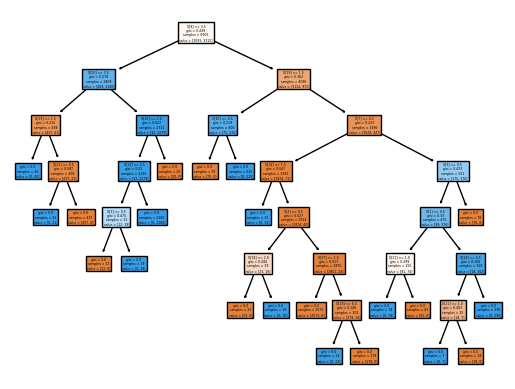

In [277]:
# Train a Decision Tree classifier.
DT_M = tree.DecisionTreeClassifier()
DT_M.fit(X_train, y_train)
tree.plot_tree(DT_M, filled=True)

In [278]:
# Train a KNN classifier.
KNN_M = KNeighborsClassifier(n_neighbors=11)
KNN_M.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=11)

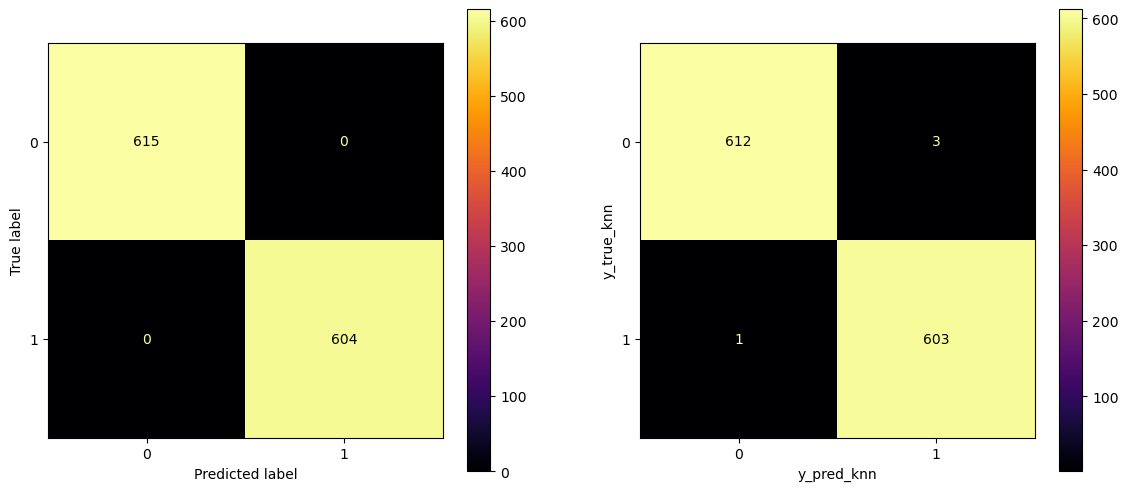

In [279]:
# Build and plot the confusion matrix for both the decision tree and knn.
from matplotlib import pyplot as plt

DT_test_pred = DT_M.predict(X_test)
DT_conf_matrix = confusion_matrix(y_test, DT_test_pred, labels=DT_M.classes_)
DT_disp = ConfusionMatrixDisplay(confusion_matrix=DT_conf_matrix, display_labels=DT_M.classes_)

KNN_test_pred = KNN_M.predict(X_test)
KNN_conf_matrix = confusion_matrix(y_test, KNN_test_pred, labels=KNN_M.classes_)
KNN_disp = ConfusionMatrixDisplay(confusion_matrix=KNN_conf_matrix, display_labels=KNN_M.classes_)

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

DT_disp.plot(ax=axes[0], cmap='inferno')
plt.xlabel('y_pred_dt')
plt.ylabel('y_true_dt')

KNN_disp.plot(ax=axes[1], cmap='inferno')
plt.xlabel('y_pred_knn')
plt.ylabel('y_true_knn')

plt.show()

In [280]:
# From the confusion matrix, we can see that the decision tree classifier performs very well with no misclassifications. 
# However, the K-NN classifier has one false negative and three false positives. 
# This is likely due to the choice of a large K value, which causes the K-NN model to rely too much on overall trends, leading to overly simplistic and underfitting results.

# Therefore, by observing the numbers of true positives, false positives, true negatives, and false negatives in the confusion matrix, we can assess the model's accuracy and misclassification behavior, providing guidance for selecting the right model and parameters.

In [281]:
# Part 3: Heart Failure

# Load the Heart Failure dataset and split the dataset into a training set and a test set.
df_HF = pd.read_csv('heart_failure_clinical_records_dataset.csv')

X_full = df_HF.drop(columns=["DEATH_EVENT"])
y = df_HF["DEATH_EVENT"]

X_reduced = df_HF[["serum_creatinine", "ejection_fraction"]]

X_train_full, X_test_full, y_train, y_test = train_test_split(X_full, y, random_state = 100, test_size = 0.15)
X_train_reduced, X_test_reduced = train_test_split(X_reduced, random_state = 100, test_size = 0.15)[0], train_test_split(X_reduced, random_state = 100, test_size = 0.15)[1]

In [282]:
# Train a Decision Tree classifier.
DT_HF_full = tree.DecisionTreeClassifier(criterion="entropy")
DT_HF_full.fit(X_train_full, y_train)

DT_HF_reduced = tree.DecisionTreeClassifier(criterion="entropy")
DT_HF_reduced.fit(X_train_reduced, y_train)

DecisionTreeClassifier(criterion='entropy')

In [283]:
# Train a KNN classifier.
KNN_HF_full = KNeighborsClassifier(n_neighbors=5)
KNN_HF_full.fit(X_train_full, y_train)

KNN_HF_reduced = KNeighborsClassifier(n_neighbors=5)
KNN_HF_reduced.fit(X_train_reduced, y_train)

KNeighborsClassifier()

In [284]:
# Predict and display the classification report.
from sklearn.metrics import classification_report

DT_HF_full_pred = DT_HF_full.predict(X_test_full)
print("Full set of features(Decision Tree):")
print(classification_report(y_test, DT_HF_full_pred))

DT_HF_reduced_pred = DT_HF_reduced.predict(X_test_reduced)
print("Reduce set of features(Decision Tree):")
print(classification_report(y_test, DT_HF_reduced_pred))

KNN_HF_full_pred = KNN_HF_full.predict(X_test_full)
print("Full set of features(KNN):")
print(classification_report(y_test, KNN_HF_full_pred))

KNN_HF_reduced_pred = KNN_HF_reduced.predict(X_test_reduced)
print("Reduce set of features(KNN):")
print(classification_report(y_test, KNN_HF_reduced_pred))

Full set of features(Decision Tree):
              precision    recall  f1-score   support

           0       0.71      0.86      0.78        29
           1       0.60      0.38      0.46        16

    accuracy                           0.69        45
   macro avg       0.66      0.62      0.62        45
weighted avg       0.67      0.69      0.67        45

Reduce set of features(Decision Tree):
              precision    recall  f1-score   support

           0       0.77      0.83      0.80        29
           1       0.64      0.56      0.60        16

    accuracy                           0.73        45
   macro avg       0.71      0.70      0.70        45
weighted avg       0.73      0.73      0.73        45

Full set of features(KNN):
              precision    recall  f1-score   support

           0       0.67      0.83      0.74        29
           1       0.44      0.25      0.32        16

    accuracy                           0.62        45
   macro avg       0.56  

In [ ]:
# Using a simplified feature set (serum creatinine and ejection fraction) improved prediction performance in both classifiers.
# For the Decision Tree, accuracy increased from 0.69 to 0.73. Similarly, for KNN, accuracy improved from 0.62 to 0.73.
# These results support the paper’s hypothesis.